# Pandas in a nutshell

Pandas is one of the most essential python library, especially when working with (tablubar) data. Pandas simplifies data curation, manipulation, and visualization of data considerably.

You can install the library with command <code>pip install pandas</code>, or just as well with <code>conda install pandas</code> in case you use Anaconda.


<u>**References:**</u> 
- For the full pandas documentation see https://pandas.pydata.org/docs/. 
- Pandas Getting Started Guide: https://pandas.pydata.org/docs/getting_started/index.html#getting-started.
- A *cheat sheet* on data manipulation with pandas: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf.
- For the basic basics of plotting with pandas, see https://www.enthought.com/wp-content/uploads/2019/09/Enthought-Pandas-Cheat-Sheet-1-Plotting-with-Series-and-DataFrames-v1.0.2.pdf.
- For more complete info on plotting with pandas see https://pandas.pydata.org/docs/user_guide/visualization.html. 

<u>**Outline:**</u>
1. [Importing the pandas library](#1)
2. [Importing data](#2)
    1. [loading Excel or csv files](#2.1)
    2. [accessing APIs](#2.2)
3. [Pandas Series](#3) **[(TASK I)](#task1)**
4. [Pandas DataFrames](#4)
    1. [Generating and accessing  Pandas DataFrames](#4.1) **[(TASK II)](#task2)**
    2. [Operations on DataFrames](#4.2)
        1. [Selecting data](#4.2.1)
        2. [Slicing data frames](#4.2.2) 
           1. [Slicing by label with loc](#4.2.2.1)
           2. [Slicing by position with iloc](#4.2.2.2)
        3. [Filtering](#4.2.3)
        4. [Transposing, Sorting, and Grouping](#4.2.4)
   **[(TASK III)](#task3)**
5. [Final Remarks](#5)

## 1. Importing the pandas library <a class="anchor" id="1"></a>
Pandas is typically imported into the namespace pd, just as numpy is typically imported as np.

In [1]:
import numpy as np
import pandas as pd

## 2. Importing data <a class="anchor" id="2"></a>
Data can be imported either by loading files or by accessing an API (Application Programming Interface).

### 2. A. loading Excel or csv files <a class="anchor" id="2.1"></a>
By read_excel https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html, read_csv https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html, tables are loaded from files into pandas data frames.

*Example data extracted from:*<br/>
[1] Nelson AB, Faraguna U, Zoltan JT, Tononi G, Cirelli C. Sleep patterns and homeostatic mechanisms in adolescent mice. Brain Sci. 2013 Mar 19;3(1):318-43. doi: 10.3390/brainsci3010318. PMID: 23772316; PMCID: PMC3682503.

In [2]:
mice_xlsx = pd.read_excel("data/Sleep_Patterns_and_Homeostatic_Mechanisms_in_Adolescent_Mice_2013.xlsx",
                         index_col=0,
                         header=0)
# show loaded table:
mice_xlsx

,p,AIC,R2
(A) Frontal: Predictors for SWA rebound (5/1); % change SWA (5/1) = B0 + (predictors),,,
Weight-adjusted age (using Gompertz fit),0.005070,362,0.18900
Recovery days from surgery,0.430000,370,0.01640
REM/NREM amount (12 h of recovery),0.007100,363,0.17500
n of sleep attempts during sleep deprivation,0.053000,367,0.09530
Sleep during sleep deprivation (min/4 h),0.058200,367,0.09130
"Brief arousals (n/min of sleep, first 4 h of recovery)",0.310000,369,0.02730
Increase in wake SWA (1–4 Hz) during sleep deprivation,0.760000,370,0.02490
Slow wave energy (SWE = SWA × time) during deprivation (wake and NREM),0.840000,371,0.00110
Time spent awake since last sleep,0.910000,371,0.00033


In [3]:
mice_csv = pd.read_csv("data/Sleep_Patterns_and_Homeostatic_Mechanisms_in_Adolescent_Mice_2013.csv",
                         index_col=0,
                         header=0)
# show loaded table:
mice_csv

,p,AIC,R2
(A) Frontal: Predictors for SWA rebound (5/1); % change SWA (5/1) = B0 + (predictors),,,
Weight-adjusted age (using Gompertz fit),0.005070,362,0.18900
Recovery days from surgery,0.430000,370,0.01640
REM/NREM amount (12 h of recovery),0.007100,363,0.17500
n of sleep attempts during sleep deprivation,0.053000,367,0.09530
Sleep during sleep deprivation (min/4 h),0.058200,367,0.09130
"Brief arousals (n/min of sleep, first 4 h of recovery)",0.310000,369,0.02730
Increase in wake SWA (1–4 Hz) during sleep deprivation,0.760000,370,0.02490
Slow wave energy (SWE = SWA × time) during deprivation (wake and NREM),0.840000,371,0.00110
Time spent awake since last sleep,0.910000,371,0.00033


### 2. 2. accessing APIs <a class="anchor" id="2.2"></a>

You will usually find example code for how to access an API on the web page that publishes the open data. For our example open data provider https://analisi.transparenciacatalunya.cat/, here for the example database https://analisi.transparenciacatalunya.cat/Energia/Consum-d-energia-el-ctrica-per-municipis-i-sectors/8idm-becu, they ask you to first install sodapy, e.g. by <code>pip install sodapy</code> and then jot:

In [4]:
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("analisi.transparenciacatalunya.cat", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(analisi.transparenciacatalunya.cat,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("8idm-becu", limit=2000)

# Convert to pandas DataFrame
consum_energia_df = pd.DataFrame.from_records(results)

# show loaded table:
consum_energia_df

,any,provincia,comarca,cdmun,municipi,codi_sector,descripcio_sector,consum_kwh,observacions
0,2014,BARCELONA,BAIX LLOBREGAT,08001,ABRERA,1,PRIMARI,271436,NaN
1,2014,BARCELONA,BAIX LLOBREGAT,08001,ABRERA,3,INDUSTRIAL,63172759,NaN
2,2014,BARCELONA,BAIX LLOBREGAT,08001,ABRERA,4,CONSTRUCCIO I OBRES PUBLIQUES,273654,NaN
3,2014,BARCELONA,BAIX LLOBREGAT,08001,ABRERA,5,TRANSPORT,NaN,Dada subjecta a secret estadístic.
4,2014,BARCELONA,BAIX LLOBREGAT,08001,ABRERA,6,TERCIARI,109619127,NaN
...,...,...,...,...,...,...,...,...,...
1995,2014,GIRONA,RIPOLLES,17107,MOLLO,3,INDUSTRIAL,NaN,Dada subjecta a secret estadístic.
1996,2014,GIRONA,RIPOLLES,17107,MOLLO,4,CONSTRUCCIO I OBRES PUBLIQUES,5517,NaN
1997,2014,GIRONA,RIPOLLES,17107,MOLLO,6,TERCIARI,404205,NaN
1998,2014,GIRONA,RIPOLLES,17107,MOLLO,7,USOS DOMESTICS,715025,NaN


You see that they limit the downloaded lines to the first 2000 lines, but you can alter these numbers according to your needs. Acctually, if you register in their webpage they give you a TOKEN that allows you to access more lines in a quicker way. 

Note that on https://analisi.transparenciacatalunya.cat/Energia/Consum-d-energia-el-ctrica-per-municipis-i-sectors/8idm-becu, you also find extensive information on who recoreded the data when or what is the meaning of each column.

## 3. Pandas Series <a class="anchor" id="3"></a>
Above, we loaded **pandas DataFrames** that represent tables. 
To begin with pandas, it is helpful to start with "one-column tables" that are represented py **pandas Series**. For the full documentation of pandas Series see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html.

In [5]:
# Pandas Series of strings
observed_birds = pd.Series(["Wallcreeper",
                            "Lammergeier",
                            "Lammergeier",
                            "Lammergeier",
                            "Dupont's Lark",
                            "Pin-tailed Sandgrouse",
                            "Lammergeier",
                            "Wallcreeper",
                            "Little Bustard",
                            "Dupont's Lark",
                            "Wallcreeper",
                            "Wallcreeper",
                            "Citril Finch",
                            "Black Wheatear",
                            "Snowfinch"
                            ], 
                           dtype = str, # if you put nothing here, pandas inferres the type itself
                           name = "birds"
                          )

# show Pandas series: 
observed_birds

0               Wallcreeper
1               Lammergeier
2               Lammergeier
3               Lammergeier
4             Dupont's Lark
5     Pin-tailed Sandgrouse
6               Lammergeier
7               Wallcreeper
8            Little Bustard
9             Dupont's Lark
10              Wallcreeper
11              Wallcreeper
12             Citril Finch
13           Black Wheatear
14                Snowfinch
Name: birds, dtype: object

<AxesSubplot:ylabel='birds'>

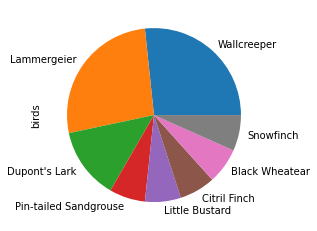

In [6]:
# the number of appearances of each bird, e.g. in a pie chart
observed_birds.value_counts().plot.pie()

Pandas Series can contain a variety of python data types, such as strings, integers, time stamps, and of course also floats. As an example, we'll draw N=10000 Gaussian random numbers and plot a histogram for them. Note that by loading pandas, we already loaded matplotlib.pyplot into namespace plt.

0      -0.283940
1       2.713681
2       0.756637
3       1.206891
4       1.045056
          ...   
9995    1.638182
9996    2.175387
9997    1.126885
9998    2.435401
9999    1.459062
Length: 10000, dtype: float64

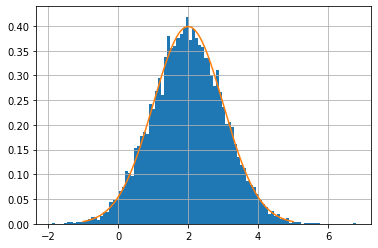

In [7]:
# you can also gererate a Pandas Series of floats...
N=10000
sigma = 1
mu = 2
random_numbers_array = np.random.normal(mu, sigma, N) # N gaussian random numbers i  a numpy array
random_numbers = pd.Series(random_numbers_array)  # convert to Series
# ... and plot the NORMALIZED histogram in one line
ax = random_numbers.hist(density=True, 
                        bins =100)
# add the analytic formula of the gaussian 
x = np.linspace(-1, 5, 200)
ax.plot(x, np.exp(-(x-mu)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma))

## and back to numpy :
# random_numbers.to_numpy()

random_numbers

# TASK I: <a class="anchor" id="task1"></a>
Label x and y axis, change the color of the bars and the line, and give the plot a title.

In the following you see that simple numpy operations can directly be applied on Pandas Series (i.e. on columns of Data Frames). The output is again a pandas Series. 

Further, you'll see that you can print some basic statistics of pandas Series using pandas function *describe*

count    10000.000000
mean         2.009734
std          0.979238
min          0.002213
25%          1.319070
50%          1.988348
75%          2.681331
max          6.794547
dtype: float64

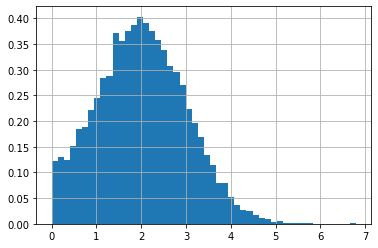

In [8]:
# take the absolute value of each item in the Pandas series 
# and plot a histogram of the result
ax = abs(random_numbers).hist(bins=50, density=True)

# print some basic statistics of a Pandas series
abs(random_numbers).describe()

## 4. Pandas DataFrames <a class="anchor" id="4"></a>
Now we really come to the Excel Sheets. Of course (!) pandas can do a LOT more than you could do with Excel, but their basic funcionalities are comparable. You find the full documentation here: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html.

### 4. A. Generating  and accessing Pandas DataFrames <a class="anchor" id="4.1"></a>
.. and some manipulations.

At first we see how to generate an empty data frame and fill it column by column. We see what's an index and what's a column. Then, we generate a data frame from a dictionary.

In [9]:
# There are plenty of different ways to create a DataFrame. 

# An empty DataFrame can be created by
df = pd.DataFrame()  
df

""


In [10]:
# This empty DataFrame can be filled columnwise with lists:

# e.g.: add new column with name "Country" to data frame df
df["Country"]  = ["UK", "France", "Spain"]
df["Capital"] = ["London", "Paris", "Madrid"]
df["Inhabitants Country in Mio"] = [67.22, 67.39, 47.35]
df

,Country,Capital,Inhabitants Country in Mio
0,UK,London,67.22
1,France,Paris,67.39
2,Spain,Madrid,47.35


In [11]:
# it makes sense to give column names without spaces, so you can do:
df.Capital  # this returns a pandas Series with name Capital!

0    London
1     Paris
2    Madrid
Name: Capital, dtype: object

We can also transform the above bird pandas series into a data frame. The Series name turns into the column name.

In [12]:
# data frames and pandas series are not the same thing
birds_df = pd.DataFrame(observed_birds)
# Note the column name
birds_df

,birds
0,Wallcreeper
1,Lammergeier
2,Lammergeier
3,Lammergeier
4,Dupont's Lark
5,Pin-tailed Sandgrouse
6,Lammergeier
7,Wallcreeper
8,Little Bustard
9,Dupont's Lark


In [13]:
# we can change the column name with function rename():
birds_df =birds_df.rename(columns={"birds":"bird names"}) # the same works with index
birds_df

,bird names
0,Wallcreeper
1,Lammergeier
2,Lammergeier
3,Lammergeier
4,Dupont's Lark
5,Pin-tailed Sandgrouse
6,Lammergeier
7,Wallcreeper
8,Little Bustard
9,Dupont's Lark


Back to the countries dataframe...

In [14]:
# column's names
df.columns

Index(['Country', 'Capital', 'Inhabitants Country in Mio'], dtype='object')

In [15]:
# row indexes names
df.index

RangeIndex(start=0, stop=3, step=1)

In [16]:
# You can also create a single-column DataFrame from a list (This is not a Pandas Series!)
df = pd.DataFrame( ["UK", "France", "Spain"], columns = ["Country"])  
df

,Country
0,UK
1,France
2,Spain


In [17]:
# or start from a python dictionary with lists as values (must be of same length).
country_dict = { "Country" :            ["UK",     "France", "Spain"],
                 "Capital":            ["London", "Paris", "Madrid"],
                 "Inhabitants Country in Mio": [67.22, 67.39, 47.35]}
# write DataFrame to file, but without the index
pd.DataFrame(country_dict).to_csv("countries.csv", index = False)
# print inline
country_df = pd.DataFrame(country_dict) # in jupyter, we just write the name of the dataFrame into the last line to show it nicely.
# in a *.py file (in a script)

country_df

,Country,Capital,Inhabitants Country in Mio
0,UK,London,67.22
1,France,Paris,67.39
2,Spain,Madrid,47.35


In [18]:
# If you pass a dictionary with scalars instead of lists, 
# you have to tell pandas how to interpret that (by adding items())
fruit_colors = {"banana": "yellow",
                "apple" : "green",
                "orange": "orange",
                "cherry": "red",
                "berry" : "black",
                "hammer": "grey"
               }
fruit_df = pd.DataFrame(fruit_colors.items(), 
                        columns=["fruit", "color"])
fruit_df

,fruit,color
0,banana,yellow
1,apple,green
2,orange,orange
3,cherry,red
4,berry,black
5,hammer,grey


In [19]:
# you might want to have fruit as the index
fruit_df = fruit_df.set_index("fruit")
fruit_df

,color
fruit,
banana,yellow
apple,green
orange,orange
cherry,red
berry,black
hammer,grey


In [20]:
# then you can access values by column + index
fruit_df.color.apple

'green'

In [21]:
# hammer is not a fruit, so we just drop it from the data frame
fruit_df = fruit_df.drop("hammer")
fruit_df

,color
fruit,
banana,yellow
apple,green
orange,orange
cherry,red
berry,black


In [22]:
# or you might regret setting "fruits" as index
fruit_df = fruit_df.reset_index()
fruit_df

,fruit,color
0,banana,yellow
1,apple,green
2,orange,orange
3,cherry,red
4,berry,black


The pandas function append() can be used to add a new row to a Data frame. You will see that it generates a warning, because in future versions of pandas it will no longer be supported, i.e. it is deprecated. Below you'll see how to use concat instead. 

In [23]:
#fruit_df = fruit_df.append({"fruit":"plum", "color":"lila"}, ignore_index=True)
#fruit_df
fruit_df.append({"fruit":"plum", "color":"lila"}, ignore_index=True)

<ipython-input-23-a1085db2a5dc>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fruit_df.append({"fruit":"plum", "color":"lila"}, ignore_index=True)


,fruit,color
0,banana,yellow
1,apple,green
2,orange,orange
3,cherry,red
4,berry,black
5,plum,lila


In [24]:
pd.concat([fruit_df,
           pd.DataFrame({"plum":"lila"}.items(), 
                        columns=["fruit", "color"])
          ], 
          ignore_index=True)

,fruit,color
0,banana,yellow
1,apple,green
2,orange,orange
3,cherry,red
4,berry,black
5,plum,lila


In [25]:
# remove column "color" with function pop
fruit_df.pop("color")
fruit_df

,fruit
0,banana
1,apple
2,orange
3,cherry
4,berry


NOTE that the usage of <code>pop()</code> (for removing columns) is different from that of <code>drop()</code> (for deleting rows):

    fruit_df = fruit_df.drop("hammer")
    fruit_df  
vs
    
    fruit_df.pop("color")
    fruit_df
    
For more on <code>pop()</code> see https://www.geeksforgeeks.org/python-pandas-dataframe-pop/

In [26]:
# And finally, and quite common, you can load excel sheets, csv files ( ..json, pickle, parquet..)
# use help(pd.read_csv("countries.csv") ) to know more
country_df = pd.read_csv("countries.csv") 
# equivalent: pd.read_excel("countries.xlsx")
country_df

,Country,Capital,Inhabitants Country in Mio
0,UK,London,67.22
1,France,Paris,67.39
2,Spain,Madrid,47.35


# TASK II: <a class="anchor" id="task2"></a>

Add another country with its capital and number of inhabitants to the table. 

### 4. B. Operations on DataFrames <a class="anchor" id="4.2"></a>

#### 4. B. a. Selecting data <a class="anchor" id="4.2.1"></a>

In [27]:
# we start from 
country_df

,Country,Capital,Inhabitants Country in Mio
0,UK,London,67.22
1,France,Paris,67.39
2,Spain,Madrid,47.35


You already know how to access columns and rows: 

In [28]:
country_df["Capital"] # returns a Series

0    London
1     Paris
2    Madrid
Name: Capital, dtype: object

In [29]:
country_df.Capital # same thing; therefore: try to avoid using spaces in your column names

0    London
1     Paris
2    Madrid
Name: Capital, dtype: object

You can overwrite a column with a list:

In [30]:
country_df.Capital = ["LON", "PAR", "MAD"] # you can replace complete columns like this
country_df

,Country,Capital,Inhabitants Country in Mio
0,UK,LON,67.22
1,France,PAR,67.39
2,Spain,MAD,47.35


And you can output a subdataframe, consisting of several columns with their entries.

In [31]:
country_df[["Country","Capital"]] # returns a DataFrame, note the flipped order of columns

,Country,Capital
0,UK,LON
1,France,PAR
2,Spain,MAD


#### 4. B. b. Slicing data frames <a class="anchor" id="4.2.2"></a>
Slicing means to output one or several columns or rows. 
Slices can be either accessed by label with loc or by index with iloc.

In [32]:
# original data frame at this point, before slicing: 
country_df

,Country,Capital,Inhabitants Country in Mio
0,UK,LON,67.22
1,France,PAR,67.39
2,Spain,MAD,47.35


#### 4. B. b. i. Slicing by label with **loc** <a class="anchor" id="4.2.2.1"></a>
To change individual fields of the dataframe you need to use loc (by label) or iloc (by position).
With indexing, your output is the value of the field.

In [33]:
# syntax: df.loc[row_indexer,column_indexer]
country_df.loc[2, "Capital"] # the output is the column value of the row with index 2 and column Capital 

'MAD'

Note that in the above example, 2 means the label and not the position of the respective row!

In [34]:
country_df.loc[2] # the output is the row with index 2 as pandas series

Country                       Spain
Capital                         MAD
Inhabitants Country in Mio    47.35
Name: 2, dtype: object

In [35]:
country_df.loc[:, "Capital"] # the output is the column Capital as pandas series

0    LON
1    PAR
2    MAD
Name: Capital, dtype: object

In [36]:
country_df

,Country,Capital,Inhabitants Country in Mio
0,UK,LON,67.22
1,France,PAR,67.39
2,Spain,MAD,47.35


#### 4. B. b. ii.  Slicing by position with **iloc** <a class="anchor" id="4.2.2.2"></a>

In [37]:
country_df.iloc[1, 2] # the output is the column value of the row with position 1 
                      # (note that python always counts from 0) and column with position 2

67.39

In [38]:
country_df.iloc[1, 0: 3] # 

Country                       France
Capital                          PAR
Inhabitants Country in Mio     67.39
Name: 1, dtype: object

### 4. B. c. Filtering <a class="anchor" id="4.2.3"></a>

Pandas Data frames (and series) can be filtered by using **boolean expressions**.

In [39]:
country_df[country_df["Country"]=="France"] # use Boolean expressions for picking a row/ several rows

,Country,Capital,Inhabitants Country in Mio
1,France,PAR,67.39


In [40]:
country_df[country_df["Inhabitants Country in Mio"] > 50] # Another boolean expression

,Country,Capital,Inhabitants Country in Mio
0,UK,LON,67.22
1,France,PAR,67.39


In [41]:
country_df[country_df["Country"]=="Spain"].Capital

2    MAD
Name: Capital, dtype: object

### 4. B. d. Transposing, Sorting, and Grouping <a class="anchor" id="4.2.4"></a>

You might have noticed that it's so easy and quick to work with columns and rather cumbersome and slow to work with rows. You can switch roles by transposing the table.

In [42]:
country_df.T

,0,1,2
Country,UK,France,Spain
Capital,LON,PAR,MAD
Inhabitants Country in Mio,67.22,67.39,47.35


You can sort an index alphabetically...

In [43]:
country_df.T.sort_index(axis=0, ascending=True) # try also: ascending = False

,0,1,2
Capital,LON,PAR,MAD
Country,UK,France,Spain
Inhabitants Country in Mio,67.22,67.39,47.35


... or sort rows by the values of a column, eg. countries by their number of inhabitants:

In [44]:
country_df.sort_values(by="Inhabitants Country in Mio", ascending=True)

,Country,Capital,Inhabitants Country in Mio
2,Spain,MAD,47.35
0,UK,LON,67.22
1,France,PAR,67.39


To show how to **group**, we first extend the countries data frame:

In [45]:
# first we add more countries
more_countries_df = pd.DataFrame({"Country" :            ["China",     "Mali", "Nauru"],
                                  "Capital":            ["PEK", "BKO", "INU"],
                                  "Inhabitants Country in Mio": [1439.32, 20.25, 0.01]}, 
                        columns=["Country", "Capital", "Inhabitants Country in Mio"])

country_df = pd.concat([country_df,
           more_countries_df
           ], 
          ignore_index=True)

country_df

,Country,Capital,Inhabitants Country in Mio
0,UK,LON,67.22
1,France,PAR,67.39
2,Spain,MAD,47.35
3,China,PEK,1439.32
4,Mali,BKO,20.25
5,Nauru,INU,0.01


In [46]:
# you might have to add the country you added above, as well.
country_df["Continent"] = ["Europe", "Europe", "Europe", "Asia", "Africa", "Oceania"] 
country_df

,Country,Capital,Inhabitants Country in Mio,Continent
0,UK,LON,67.22,Europe
1,France,PAR,67.39,Europe
2,Spain,MAD,47.35,Europe
3,China,PEK,1439.32,Asia
4,Mali,BKO,20.25,Africa
5,Nauru,INU,0.01,Oceania


In [47]:
country_df.sort_values(by="Inhabitants Country in Mio")

,Country,Capital,Inhabitants Country in Mio,Continent
5,Nauru,INU,0.01,Oceania
4,Mali,BKO,20.25,Africa
2,Spain,MAD,47.35,Europe
0,UK,LON,67.22,Europe
1,France,PAR,67.39,Europe
3,China,PEK,1439.32,Asia


Then we add the corresonding continents:

In [48]:
country_df[["Inhabitants Country in Mio", "Continent"]].groupby('Continent').sum()

,Inhabitants Country in Mio
Continent,
Africa,20.25
Asia,1439.32
Europe,181.96
Oceania,0.01


# TASK III: <a class="anchor" id="task3"></a>

Catalunya has 7.57 Mio inhabitants. Imagine that it gets independent today. Update the number of inhabitants in the row of Spain, and change the name "Spain" to "Spain (wo Catalunya)". Try not to calculate 47.35-7.57 yourself.

##### Hint: There are several possible ways:
1. using **set_index()**, **loc**, **-=**, **rename**, and **reset_index()** 
2. with **boolean expressions** (for the country that is Spain, do), **.index**., and two times **loc**
3. by adding Catalunya to the table as a a new country and subtract its inhabitants from Spain.

You might want to crate a copy of the current data frame, so you don't have to rerun the notebook over and over again.

In [49]:
country_df_copy = country_df.copy()

## 5. Final Remarks <a class="anchor" id="5"></a>

1. use tab completion in pandas: start to write df.pl and fill by pressing TAB to complete, e.g. to df.plot()
2. depending on what we find in the databases that you chose, we might have to deal with Missing Data https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data